<a href="https://colab.research.google.com/github/SarojaPandiyan/DimentionalityReduction/blob/main/ML_assignment1_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounting File System to access dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive',True)

Mounted at /content/drive


Loading and viewing dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
test_ds=pd.read_csv('/content/drive/MyDrive/Dimentionality reduction/test.csv')
test_ds.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [ ]:
target_name=test_ds['Activity'].unique()
print(target_name)

['STANDING' 'SITTING' 'LAYING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']


In [ ]:
train_ds=pd.read_csv('/content/drive/MyDrive/Dimentionality reduction/train.csv')
train_ds.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


Function to preprocess the data

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [ ]:
def preprocess_data(train_df,test_df,target_column):
    X_train=train_df.drop(target_column,axis=1)
    y_train=train_df[target_column]
    X_test=test_df.drop(target_column,axis=1)
    y_test=test_df[target_column]

    num_cols=X_train.select_dtypes(include=['int64','float64']).columns
    cat_cols=X_train.select_dtypes(include=['object','category']).columns
    print(f"Numerical Columns: {num_cols}")
    print(f"Categorical Columns: {cat_cols}")
    num_pipeline=Pipeline([
        ('imputer',SimpleImputer(strategy='mean')),
        ('scaler',StandardScaler())
    ])
    cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ])
    preprocessor=ColumnTransformer([
        ('num',num_pipeline,num_cols),
        ('cat',cat_pipeline,cat_cols)
    ],remainder='passthrough')

    X_train_preprocessed=preprocessor.fit_transform(X_train)
    X_test_preprocessed=preprocessor.transform(X_test)

    label_encoder = LabelEncoder()
    y_train_preprocessed = label_encoder.fit_transform(y_train)
    y_test_preprocessed = label_encoder.transform(y_test)

    return X_train_preprocessed,X_test_preprocessed,y_train_preprocessed,y_test_preprocessed

In [ ]:
X_train_preprocessed,X_test_preprocessed,y_train,y_test=preprocess_data(train_ds,test_ds,'Activity')

Numerical Columns: Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-skewness()', 'fBodyBodyGyroJerkMag-kurtosis()',
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject'],
      dtype='object', length=562)
Categorical Columns: Index([], dtype='object')


In [ ]:
print(X_train_preprocessed.shape)
print(X_test_preprocessed.shape)
print(y_train.shape)
print(y_train)
print(y_test.shape)

(7352, 562)
(2947, 562)
(7352,)
[2 2 2 ... 5 5 5]
(2947,)


Reducing the Dimentions to make the analysis easy

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [ ]:
lda=LDA(n_components=5)
X_train_lda=lda.fit_transform(X_train_preprocessed,y_train)
X_test_lda=lda.transform(X_test_preprocessed)

In [ ]:
print(X_train_lda.shape)
print(X_train_lda)
print(X_test_lda.shape)
print(X_test_lda)

(7352, 5)
[[-10.23994145  -8.50475869   0.65198605   1.00761755   4.00987614]
 [ -9.88306333  -6.87326845   0.52046391  -0.54720543   2.27511678]
 [ -9.90024902  -7.02949315  -0.04008535  -0.09345024   3.74701291]
 ...
 [ 14.4184033    0.93539733   0.1504421   -6.57082932  -1.05736875]
 [ 14.60341466   1.91387724  -0.22793023  -7.29222893  -0.70674021]
 [ 15.63304469   2.11119059  -0.55453176  -6.31722526  -0.46456849]]
(2947, 5)
[[-10.64260381  -7.28575321   1.69561764  -0.64529094   3.97211953]
 [ -8.8889058   -7.9035769    0.0719667   -1.92974736   2.63226084]
 [ -9.92017651  -7.54379854   0.75353057  -1.14302905   1.74082165]
 ...
 [ 13.81433707   0.12356183  -1.27952399  -4.27162648  -0.63544698]
 [ 12.94065447  -0.14258645  -0.66979276  -4.27326661  -1.08381955]
 [ 14.31717091   0.42304234  -1.41398478  -4.63681223   0.22099101]]


Using Classification algorithm and training a model

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

In [ ]:
def visualize(X,y):
  df = pd.DataFrame(X,columns=['Comp1','Comp2','Comp3','Comp4','Comp5'])
  df['Class'] = y

  plt.figure(figsize=(10,6))
  parallel_coordinates(df,'Class',color=('red','green','blue','yellow','black'),alpha=0.7,linewidth=2)

  plt.title('Parallel Coordinates Plot',fontsize=16)
  plt.xlabel('Features',fontsize=12)
  plt.ylabel('Values',fontsize=12)
  plt.grid(True)
  plt.legend(title='Class',fontsize=10)
  plt.xticks(rotation=45,fontsize=10)
  plt.yticks(fontsize=10)

  plt.tight_layout()
  plt.show()

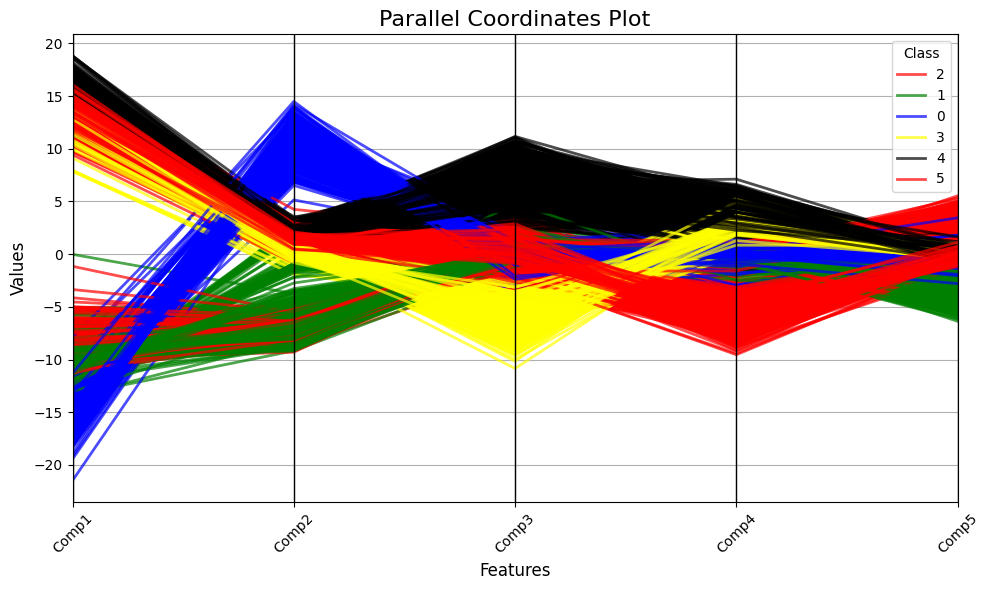

In [ ]:
visualize(X_train_lda,y_train)

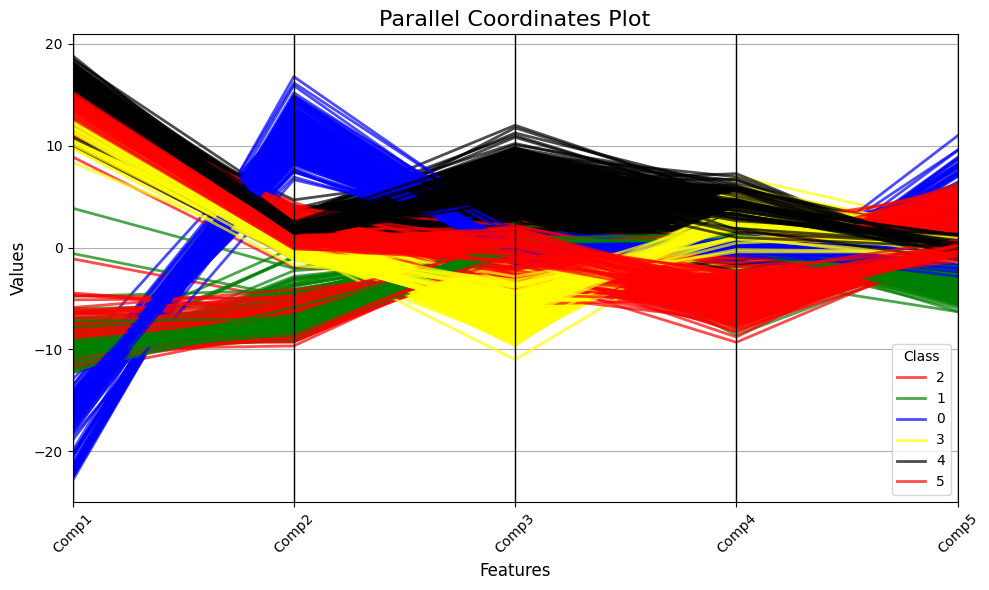

In [ ]:
visualize(X_test_lda,y_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score,f1_score

In [ ]:
clf=DecisionTreeClassifier(random_state=42)
clf.fit(X_train_lda,y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred=clf.predict(X_test_lda)
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred,average='weighted')
recall=recall_score(y_test,y_pred,average='weighted')
f1=f1_score(y_test,y_pred,average='weighted')
report=classification_report(y_test,y_pred,target_names=target_name)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Classification Report:')
print(report)

Accuracy: 0.9524940617577197
Precision: 0.9529055274291146
Recall: 0.9524940617577197
F1 Score: 0.9524889079904203
Classification Report:
                    precision    recall  f1-score   support

          STANDING       1.00      1.00      1.00       537
           SITTING       0.91      0.89      0.90       491
            LAYING       0.90      0.92      0.91       532
           WALKING       0.97      0.99      0.98       496
WALKING_DOWNSTAIRS       1.00      0.94      0.97       420
  WALKING_UPSTAIRS       0.94      0.97      0.95       471

          accuracy                           0.95      2947
         macro avg       0.95      0.95      0.95      2947
      weighted avg       0.95      0.95      0.95      2947



In [ ]:
#using partial least square regression method
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error,accuracy_score

pls=PLSRegression(n_components=5)
X_train_pls=pls.fit_transform(X_train_preprocessed, y_train)[0]
print(X_train_pls.shape)
X_test_pls=pls.transform(X_test_preprocessed)
print(X_test_pls.shape)

(7352, 5)
(2947, 5)


Visualizing the data using Parallel COordinate plot

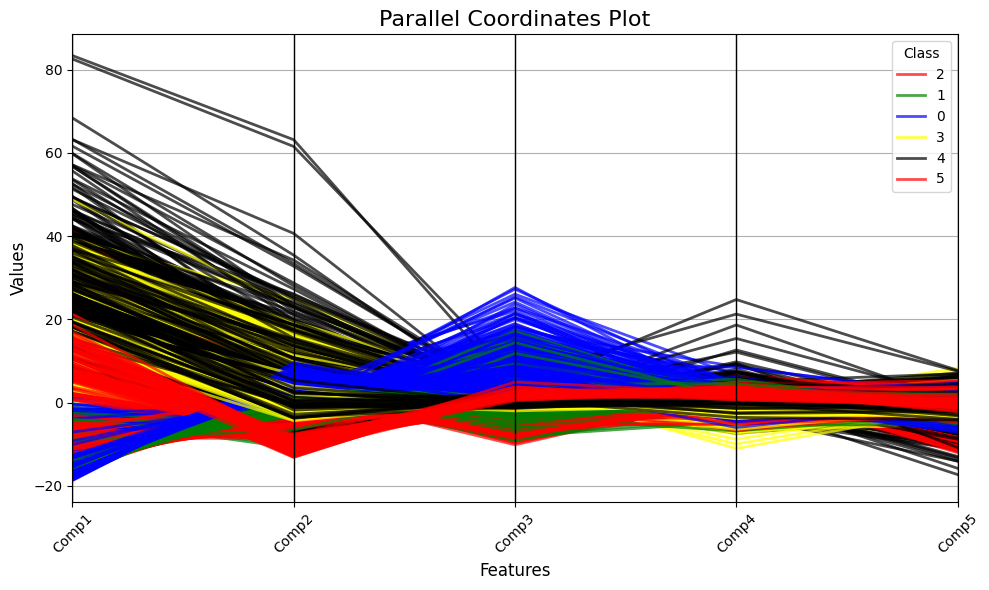

In [ ]:
visualize(X_train_pls,y_train)

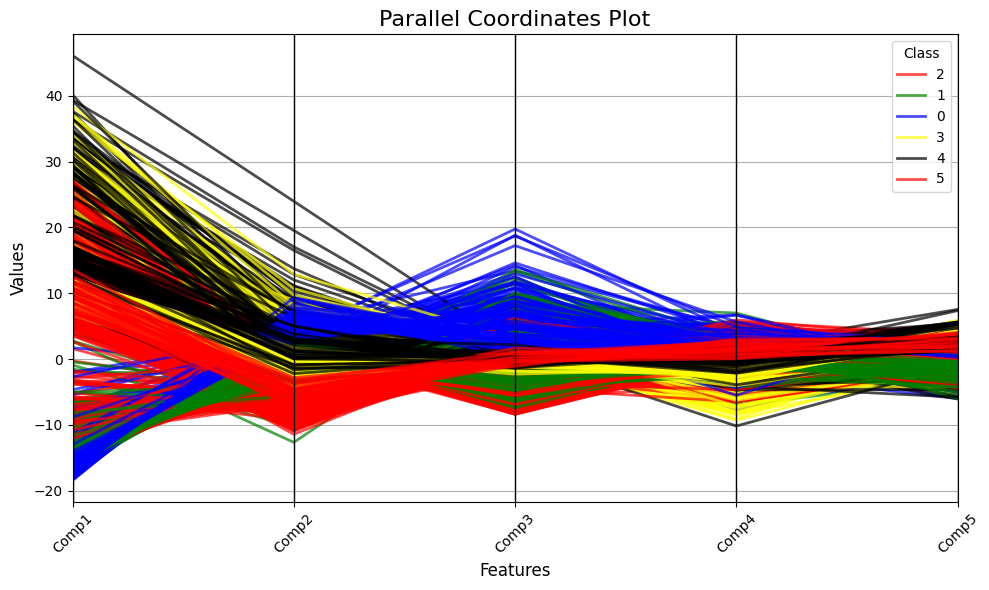

In [ ]:
visualize(X_test_pls,y_test)

In [ ]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_pls, y_train)
y_pred = clf.predict(X_test_pls)

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred,average='weighted')
recall=recall_score(y_test,y_pred,average='weighted')
f1=f1_score(y_test,y_pred,average='weighted')
report=classification_report(y_test,y_pred,target_names=target_name)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Classification Report:')
print(report)

Accuracy: 0.7332880895826264
Precision: 0.7362971152817773
Recall: 0.7332880895826264
F1 Score: 0.7334701911879895
Classification Report:
                    precision    recall  f1-score   support

          STANDING       0.96      0.91      0.93       537
           SITTING       0.59      0.61      0.60       491
            LAYING       0.68      0.70      0.69       532
           WALKING       0.79      0.90      0.84       496
WALKING_DOWNSTAIRS       0.59      0.59      0.59       420
  WALKING_UPSTAIRS       0.77      0.66      0.71       471

          accuracy                           0.73      2947
         macro avg       0.73      0.73      0.73      2947
      weighted avg       0.74      0.73      0.73      2947

